# Import libraries and data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq  # library to read parquet files

In [2]:
# train data base

df = pd.read_csv('train.csv')
df.head()

,ID,State.Name,Year,Age,Incidence
0,f8312a4,Alabama,1990,65-69,4685.284313
1,3effa36,Alabama,1990,70-74,4827.052043
2,1e8044b,Alabama,1990,75-79,4377.956914
3,d875d65,Alabama,1990,80-84,3822.732993
4,46e6695,Alabama,1990,85-89,3470.199503


In [39]:
test = pd.read_csv('test.csv')
test.head()

,ID,State.Name,Year,Age
0,6c06615,Delaware,1990,65-69
1,e0cf76e,Delaware,1990,70-74
2,e9f95f0,Delaware,1990,75-79
3,5dffe44,Delaware,1990,80-84
4,9f9ea9b,Delaware,1990,85-89


In [4]:
# read parquet file and make it pandas dataframe

haps = pq.read_table('supplementary_HAPS.parquet').to_pandas()
haps.head(3)

,State.Name,Date.Local,Parameter.Name,Arithmetic.Mean,X1st.Max.Value
0,Alabama,1980-01-04,Arsenic (TSP) STP,0.0,0.0
1,Alabama,1980-01-16,Arsenic (TSP) STP,0.0,0.0
2,Alabama,1980-01-28,Arsenic (TSP) STP,0.0,0.0
3,Alabama,1980-02-09,Arsenic (TSP) STP,0.0,0.0
4,Alabama,1980-02-21,Arsenic (TSP) STP,0.0,0.0


In [9]:
# lead parquet file into pandas dataframe

lead = pq.read_table('supplementary_LEAD.parquet').to_pandas()
lead.head(3)

,State.Name,Date.Local,Parameter.Name,Arithmetic.Mean,X1st.Max.Value
0,Alabama,1980-01-04,Lead (TSP) STP,0.04,0.04
1,Alabama,1980-01-16,Lead (TSP) STP,0.26,0.26
2,Alabama,1980-01-28,Lead (TSP) STP,0.13,0.13


In [7]:
# nono parquete file into pandas dataframe

nono = pq.read_table('supplementary_NONOxNOy.parquet').to_pandas()
nono.head(3)

,State.Name,Date.Local,Parameter.Name,Arithmetic.Mean,X1st.Max.Value
0,Alabama,1980-01-01,Nitric oxide (NO),54.458333,275.0
1,Alabama,1980-01-02,Nitric oxide (NO),130.545455,279.0
2,Alabama,1980-01-03,Nitric oxide (NO),122.333333,421.0


In [8]:
#vocs parquet file into pandas dataframe

vocs = pq.read_table('supplementary_VOCS.parquet').to_pandas()
vocs.head(3)

,State.Name,Date.Local,Parameter.Name,Arithmetic.Mean,X1st.Max.Value
0,Alabama,1980-01-01,Total NMOC (non-methane organic compound),627.083333,2020.0
1,Alabama,1980-01-02,Total NMOC (non-methane organic compound),1240.909091,3360.0
2,Alabama,1980-01-03,Total NMOC (non-methane organic compound),2079.166667,5670.0


# EDA

In [12]:
# we can see the parquet files have more than 7 million observations, vocs have 26 million observatios
print(df.shape, haps.shape, lead.shape, nono.shape, vocs.shape)

(4500, 5) (9834368, 5) (866835, 5) (7987680, 5) (26601135, 5)


#### First we explore train

In [14]:
# we can see there are n missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          4500 non-null   object 
 1   State.Name  4500 non-null   object 
 2   Year        4500 non-null   int64  
 3   Age         4500 non-null   object 
 4   Incidence   4500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 175.9+ KB


In [17]:
df.Age.value_counts()

65-69    750
70-74    750
75-79    750
80-84    750
85-89    750
90-94    750
Name: Age, dtype: int64

In [40]:
df['State.Name'].value_counts(dropna = False)

Alabama                 180
Iowa                    180
Texas                   180
Tennessee               180
Oregon                  180
Oklahoma                180
Ohio                    180
North Dakota            180
North Carolina          180
Montana                 180
Mississippi             180
Michigan                180
Indiana                 180
Alaska                  180
Idaho                   180
Hawaii                  180
Georgia                 180
Florida                 180
District of Columbia    180
Connecticut             180
Colorado                180
California              180
Arkansas                180
Arizona                 180
Washington              180
Name: State.Name, dtype: int64

In [41]:
test['State.Name'].value_counts(dropna = False)

Delaware          180
Illinois          180
Wisconsin         180
West Virginia     180
Virginia          180
Vermont           180
Utah              180
South Dakota      180
South Carolina    180
Rhode Island      180
Pennsylvania      180
New York          180
New Mexico        180
New Jersey        180
New Hampshire     180
Nevada            180
Nebraska          180
Missouri          180
Minnesota         180
Massachusetts     180
Maryland          180
Maine             180
Louisiana         180
Kentucky          180
Kansas            180
Wyoming           180
Name: State.Name, dtype: int64

In [30]:
df.Year.value_counts(dropna = False).sort_values().head()

1990    150
1993    150
1994    150
1995    150
1996    150
Name: Year, dtype: int64

In [33]:
df.Incidence.describe()

count    4500.000000
mean     4704.663094
std      1525.974789
min      2725.462720
25%      3448.309431
50%      3999.505948
75%      5862.682928
max      9200.199095
Name: Incidence, dtype: float64

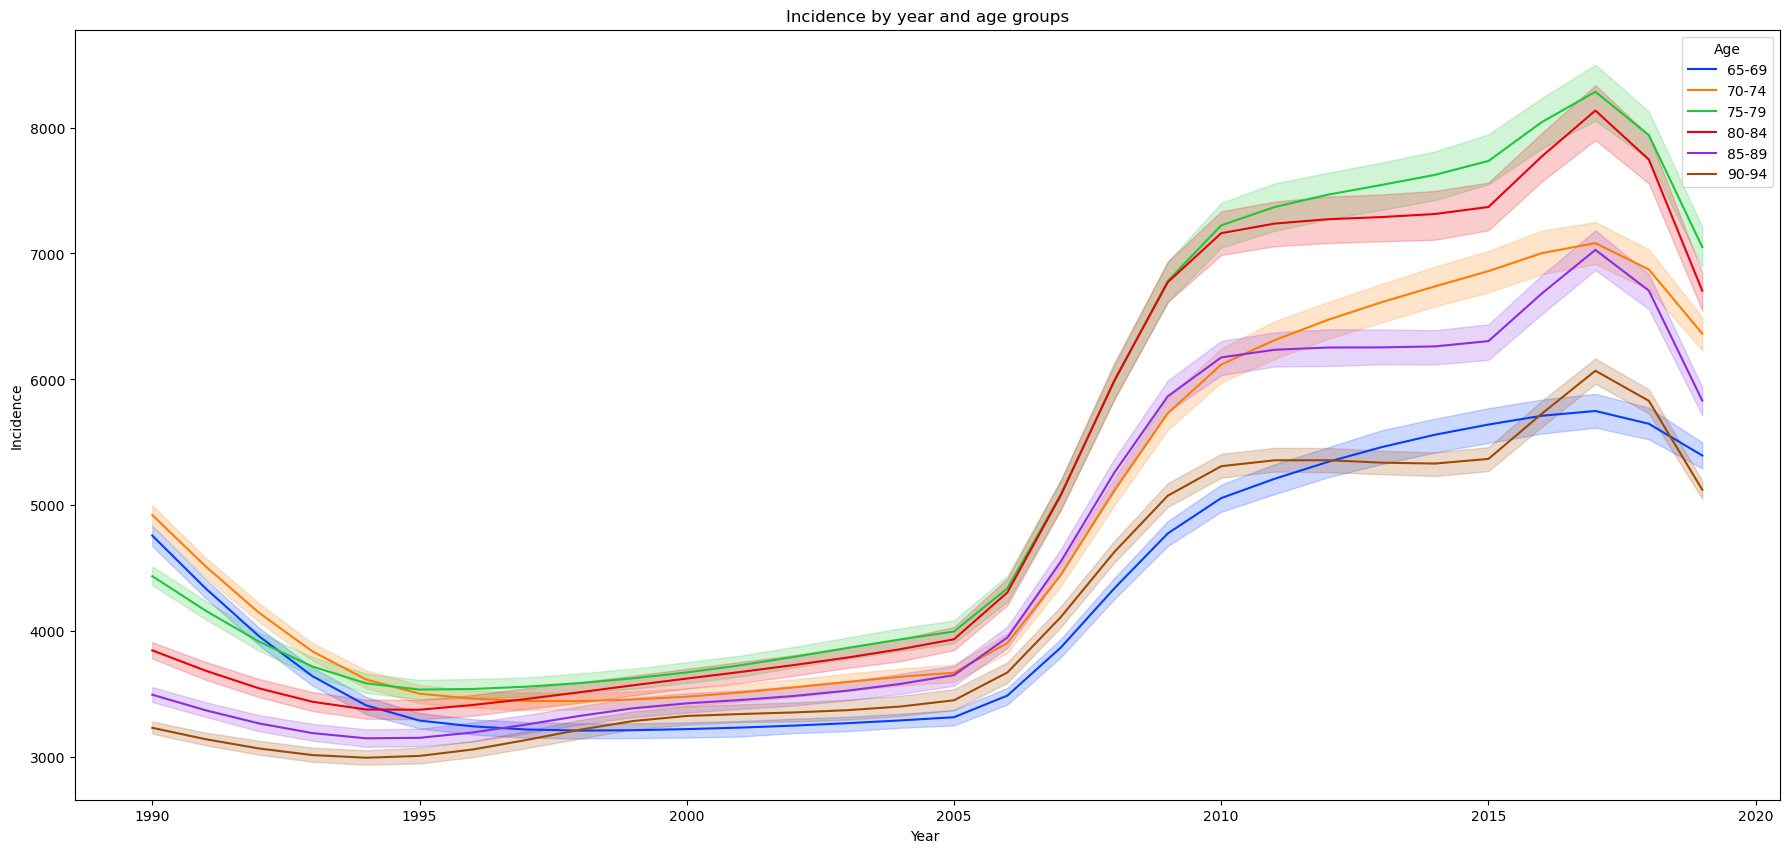

In [25]:
plt.figure(figsize=(22,10))

ax = sns.lineplot(df, x='Year', y='Incidence', hue='Age', palette = 'bright')

ax.set(xlabel='Year ', 
       ylabel='Incidence', 
       title='Incidence by year and age groups');

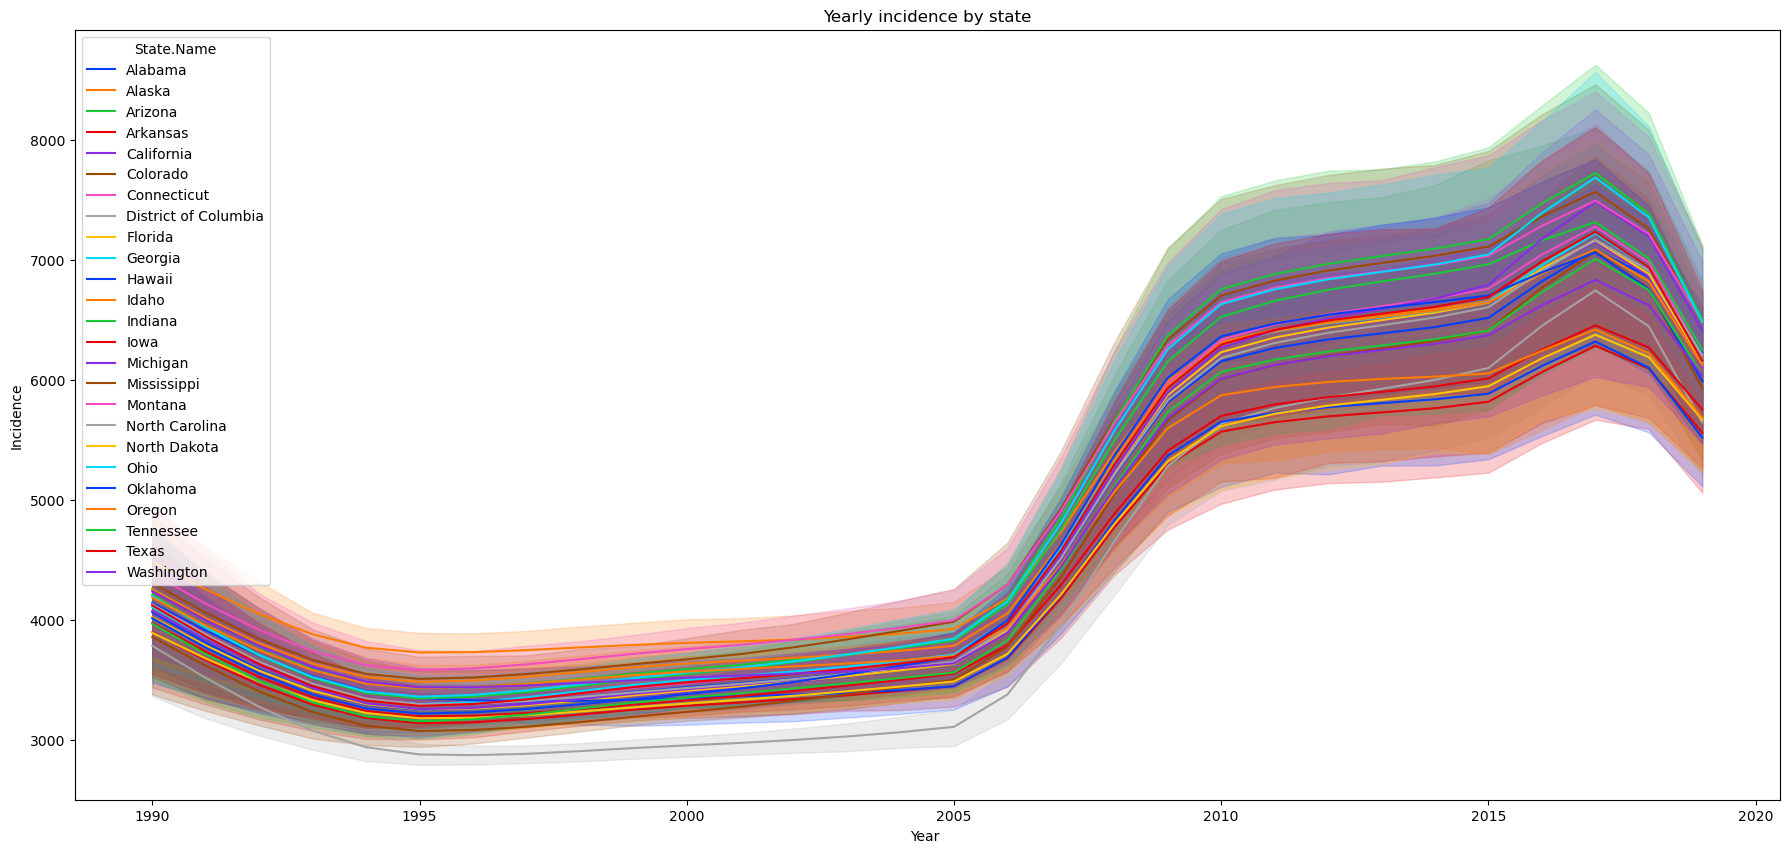

In [34]:
plt.figure(figsize=(22,10))

ax = sns.lineplot(df, x='Year', y='Incidence', hue='State.Name', palette = 'bright')

ax.set(xlabel='Year ', 
       ylabel='Incidence', 
       title='Yearly incidence by state');

#  To do:

- change 'df' to train
- agregar 'df_' a todas las bases
- Understand definition of incidence (is it comparable accross States? like incidence per 100,000 persons would be?: 

    "Incidence - This is the target variable representing the incidence rate of chronic respiratory diseases in the given age group. This means how many new cases there are in a year divided by how many people there are in the middle of the year."

- Group other data bases
- explorar sólo Alabama para ver si incidencia es diaria -- si diaria - quedarnos con máx, min, interval en que esté cada ciudad mediana mas s.d. por año 

# Notes

- we can't eliminate states because there are different states in train and test set

In [44]:
# len(lead.groupby('State.Name')['Date.Local'].count())
lead.groupby('State.Name')['Date.Local'].min()  # 1980-01-01  min

State.Name
Alabama                 1980-01-01
Alaska                  1980-01-04
Arizona                 1980-01-04
Arkansas                1981-01-10
California              1980-01-01
Colorado                1980-01-01
Connecticut             1980-01-04
Delaware                1980-01-04
District of Columbia    1981-07-09
Florida                 1980-01-04
Georgia                 1980-01-04
Hawaii                  1980-01-04
Idaho                   1980-01-01
Illinois                1980-01-01
Indiana                 1980-01-04
Iowa                    1980-01-04
Kansas                  1980-01-04
Kentucky                1980-01-01
Louisiana               1980-01-04
Maine                   1980-01-04
Maryland                1980-01-01
Massachusetts           1980-01-04
Michigan                1980-01-01
Minnesota               1980-01-04
Mississippi             1980-05-27
Missouri                1982-01-05
Montana                 1980-01-01
Nebraska                1980-01-04
Nevada   

In [35]:
lead.columns

Index(['State.Name', 'Date.Local', 'Parameter.Name', 'Arithmetic.Mean',
       'X1st.Max.Value'],
      dtype='object')